##Classificação Linear
Nesse notebook vamos refrescar a sua memória sobre equações lineares ao mesmo tempo que te ajudaremos a enxergar uma reta como um classificador linear.

Nota: Mesmo que você já saiba tudo sobre retas, não pule essa aula! Aqui já damos os primeiros passos para a criação de redes neurais.

Equação da reta
A equação da reta é aprendida na forma ax + by + c, mas para nos adequarmos às nomenclaturas de redes neurais, podemos reescrever essa equação como
w1x1 + w2x2 + b. Ou seja são os parâmetros que definem a nossa rede linear, a nossa reta.

Vamos começar realizando o plot de uma reta específica: -1x + 4x + 0,4


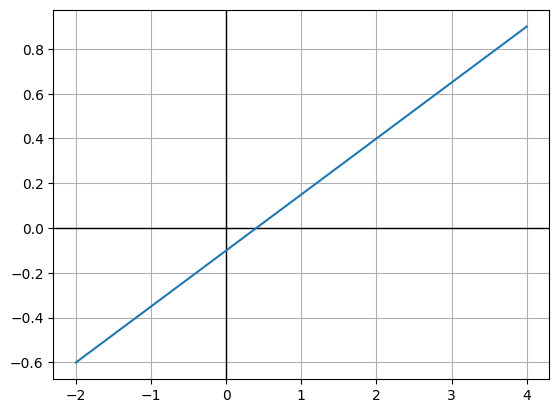

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x -c)/b
def plotline(a, b, c):
  x = np.linspace(-2, 4, 50)
  y = (-a*x -c)/b

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)

plotline(a, b, c)

##Solucionando a equação da reta para diferentes pontos
A seguir vamos selecionar três pontos no espaço, e soucionar a equação da reta para esses pontos.

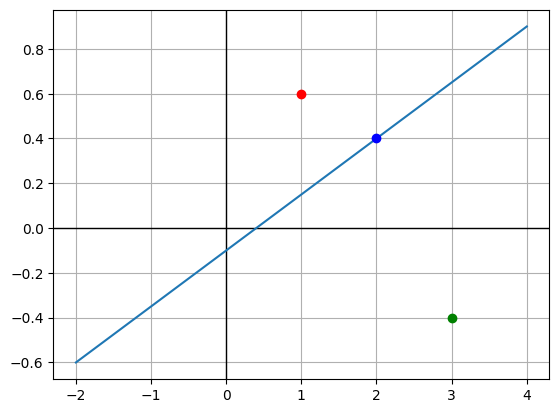

In [2]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a,b,c)
plt.plot(p1[0], p1[1], color='b', marker='o')
plt.plot(p2[0], p2[1], color='r', marker='o')
plt.plot(p3[0], p3[1], color='g', marker='o')


In [3]:
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)

ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)

ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)

0.00
1.80
-4.20


Note que o ponto p1 está na reta, enquanto o p2 está acima da reta e
 abaixo. Ao solucionar a equação da reta para esses três pontos, tivemos respectivamente resultados nulo (=0), positivo (>0) e negativo (<0).

Esse comportamento é consistente para quaisquer pontos na reta, acima ou abaixo dela. Ou seja, se chamarmos a equação da reta de f(x), temos as seguintes regras:

f(x) = 0 define pontos na reta

f(x) > 0 define pontos acima da reta

f(x) < 0 define pontos abaixo da reta

##Modelo Linear
Nossa reta pode ser interpretada como um modelo linear, que nada mais é do que uma função de mapeamento X -› Y, que mapeia cada ponto em X para um ponto em Y. Em outras palavras, dados os parâmetros W = {W1, w2} e 6 de uma reta, é possível mapear uma entrada X = {21, 22} para a saída f(x; W, b).

Para problemas de classificação, os valores de y para novas entradas a vão definir se a é um ponto acima ou abaixo da reta, formando portanto um classificador capaz de separar linearmente problemas com duas classes.

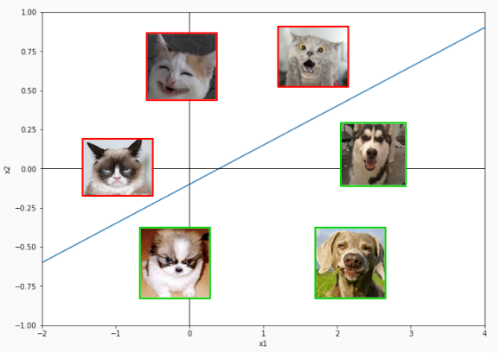

##Regra Geral
Formalizando a nomenclatura de redes neurais, em duas dimensões (I1, 22) nosso modelo linear tem dois pesos (W1,W2) e um viés b, que em inglês são chamados de weight e bias.

Em duas dimensões nosso modelo forma uma reta, como vimos anteriormente. Para um número de dimensões d > 2, modelos lineares são chamados de hiperplanos, e são compostos por:

• um peso w, para cada dimensão 2;.

• um único viés b

Exemplo, para 3 dimensões (21, 22, 23) teríamos três pesos (W1, w2, w3) e um único viés b. Sua função de mapeamento seria
y = WiT1 + W222 + w323 + 6

De forma geral, define-se que dada uma entrada com d dimensões, a função de mapeamento de um modelo linear é
 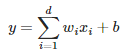

In [ ]:
y = w1*x1 + w2*x2 + b
y = w1*x1 + w2*x2 + w3*x3 + b

##Exercício Sugerido
Vamos treinar um classificador linear em duas dimensões usando a tecnologia mais avançada que existe: o seu cérebro!

A célula a seguir produz uma distribuição aleatória para um problema de classificação com duas classes, usando a função make_classification() do sklearn.
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

0


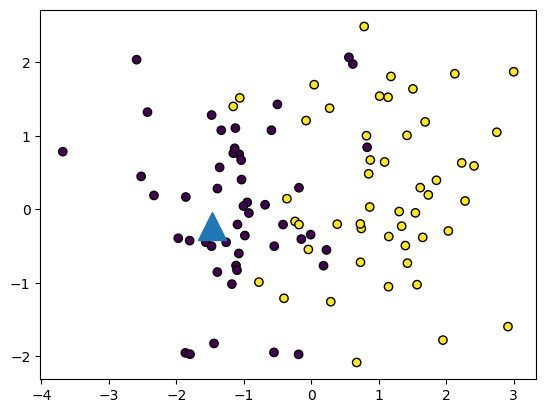

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)


Seu trabalho é encontrar os melhores parâmetros  (W, b) de um modelo linear para classificar a distribuição gerada.

O ideal é não fazer por tentativa e erro, mas prestar atenção no impacto de cada mudança realizada. Note que os pesos W são componentes angulares do seu modelo, enquanto o viés b é o componente linear que desloca a reta no espaço.

-4.4


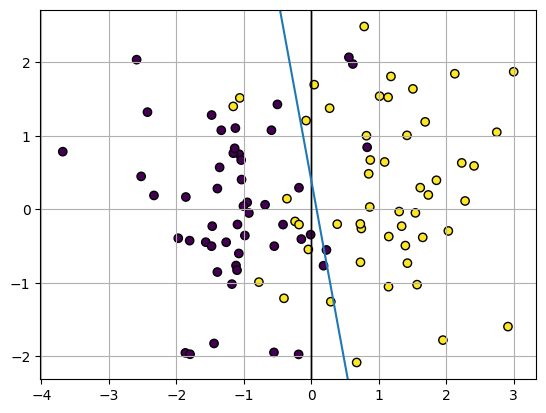

In [21]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
              edgecolors='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax =plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1 * x - b) / w2

  plt.axvline(0, -1, 1, color='k', linewidth = 1)
  plt.axvline(0, -2, 4, color='k', linewidth = 1)
  plt.plot(x, y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1 #b
b = -0.4 #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

Agora podemos utilizar o nosso modelo como um classificador linear com um simples if para avaliar a solução da equação da reta para novos pontos no espaço.

1 yellow


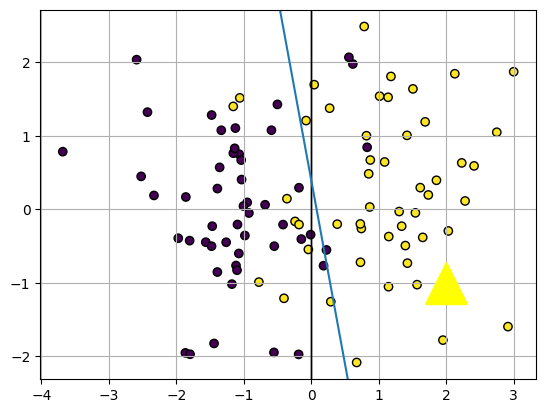

In [22]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

De posse da função classify() podemos agora classificar cada um dos pontos gerados aleatoriamente pelo make_classification, calculando assim a acurácia do nosso modelo.



In [23]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1


print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0
